In [1]:
from brain2kg.text2kg.eda_pipeline import EDA

[nltk_data] Downloading package punkt to /Users/jamino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/jamino/Library/Caches/pypoetry/virtualenvs/brain2kg-saEV5tpU-py3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
open('examples.log', 'w').close() # clear local log

In [3]:
config = {
    # OIE
    'oie_llm': 'llama3.1',
    'oie_prompt_template_file_path': 'prompt_templates/oie_fsp_template.txt',
    'oie_few_shot_example_file_path': 'few_shot_examples/oie_few_shot_examples.txt',
    # SD
    'sd_llm': 'llama3.1',
    'sd_prompt_template_file_path': 'prompt_templates/sd_fsp_template.txt',
    'sd_few_shot_example_file_path': 'few_shot_examples/sd_few_shot_examples.txt',
    # SA
    'sa_target_schema_file_path': 'schemas/webnlg_schema.csv',
    'sa_llm': 'llama3.1',
    'sa_embedding_model': 'sentence-transformers/all-MiniLM-L6-v2',
    'sa_prompt_template_file_path': 'prompt_templates/sa_template.txt'
}
eda = EDA(**config)

In [4]:
output_kg_list = eda.extract_kg(
    input_text_file_path='data/raw_text/neuro_data.txt',
    output_dir='examples/outputs'
)

Aligning: 100%|██████████| 11/11 [00:34<00:00,  3.15s/it]


In [5]:
# Before
output_kg_list[0]

[[['I', 'isPartOf', 'Unknown']],
 [['What_is_ADHD?', 'definitionOf', 'ADHD']],
 [['Attention_Deficit_Hyperactivity_Disorder',
   'characterizedBy',
   'inattention'],
  ['Attention_Deficit_Hyperactivity_Disorder', 'prevalence', 'most_prevalent'],
  ['ADHD', 'publicationYear', '2018'],
  ['ADHD', 'publishedIn', 'Rubia_2018'],
  ['ADHD', 'typeOf', 'neurodevelopmental_disorders']],
 [['ADHD_symptoms', 'manifestationDomain', 'cognitive_domains'],
  ['ADHD_symptoms', 'include', 'executive_function_deficits']],
 [['Individuals_with_ADHD',
   'exhibitIn',
   'significant_variability_in_symptom_expression'],
  ['same_individual', 'hasProperty', 'Individuals_with_ADHD']],
 [['Posner_et_al._2020', 'studyYear', '2020'],
  ['ones_degree_of_arousal',
   'hasModulation',
   'cognitive_energetic_modulation']],
 [['ADHD', 'causesIncreasedSensitivityTo', 'sensory_stimuli'],
  ['sensory_stimuli', 'type', 'touch'],
  ['sensory_stimuli', 'type', 'visual_inputs'],
  ['sensory_stimuli', 'type', 'auditory_in

In [6]:
# After
output_kg_list[1]

[[['I', 'isPartOf', 'Unknown']],
 [['What_is_ADHD?', 'nickname', 'ADHD']],
 [['Attention_Deficit_Hyperactivity_Disorder', 'type', 'inattention'],
  ['Attention_Deficit_Hyperactivity_Disorder',
   'populationDensity',
   'most_prevalent'],
  ['ADHD', 'established', '2018'],
  ['ADHD', 'publisher', 'Rubia_2018'],
  ['ADHD', 'category', 'neurodevelopmental_disorders']],
 [['ADHD_symptoms', 'location', 'cognitive_domains'],
  ['ADHD_symptoms', 'isPartOf', 'executive_function_deficits']],
 [['Individuals_with_ADHD',
   'nickname',
   'significant_variability_in_symptom_expression'],
  ['same_individual', 'tenant', 'Individuals_with_ADHD']],
 [['Posner_et_al._2020', 'established', '2020'],
  ['ones_degree_of_arousal', 'state', 'cognitive_energetic_modulation']],
 [['ADHD', 'starring', 'sensory_stimuli'],
  ['sensory_stimuli', 'type', 'touch'],
  ['sensory_stimuli', 'type', 'visual_inputs'],
  ['sensory_stimuli', 'type', 'auditory_inputs'],
  ['ADHD', 'club', 'vigilant_attention'],
  ['ADHD',

/Users/jamino/BrainKB/brain2kg/text2kg/kg_grapher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


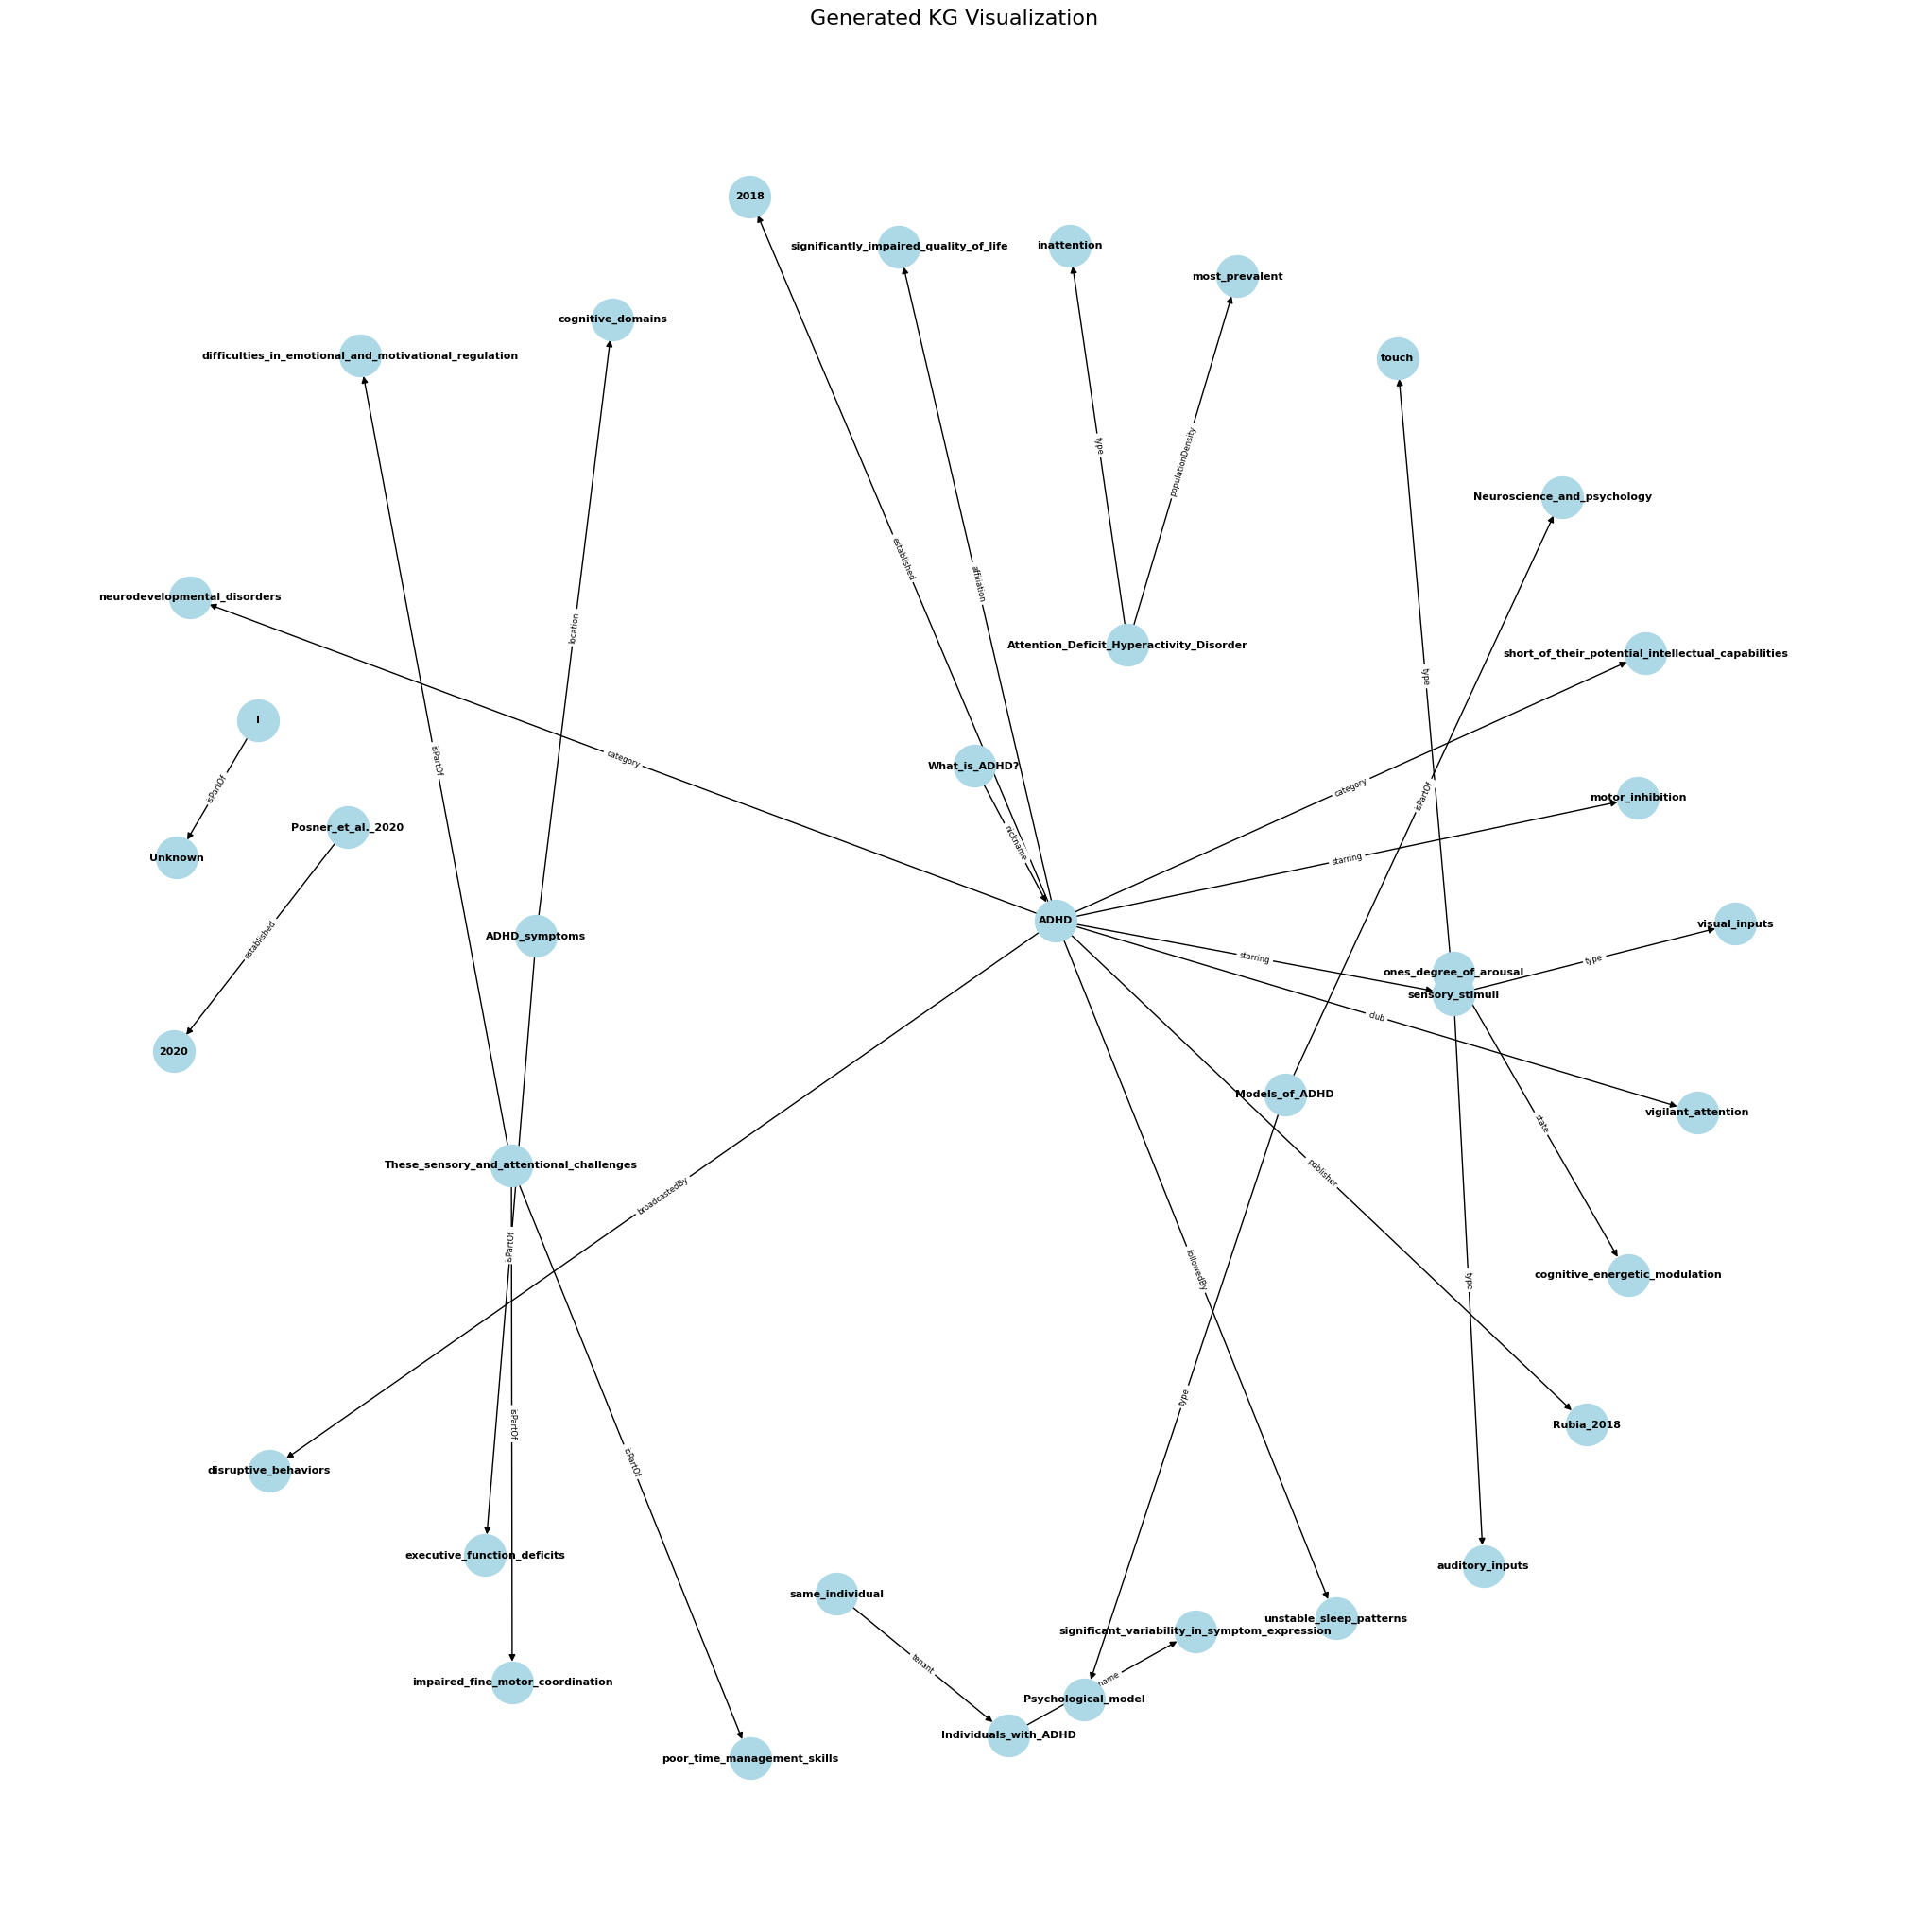

In [7]:
from brain2kg.text2kg.kg_grapher import KGVisualizer
# grapher
final_triplets = output_kg_list[1]
kgv = KGVisualizer(final_triplets)
kgv.graph_kg()